# TP3 : Chaînes de Markov à espace d'états fini

On commence par importer les bibliothèques usuelles :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Introduction aux matrices dans Python

Pour représenter les matrices (et vecteurs) dans Python, on utilise le type `np.array`, similaire aux listes. La syntaxe est cohérente avec ce que vous avez appris en algèbre linéaire, à ceci près que les indices commencent à $0$ pour les lignes et les colonnes.

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A) # La matrice A
print(A[0,1]) # Le coefficient de la 1ere ligne, 2eme colonne.
print(A[:,2]) # La 3eme colonne

[[1 2 3]
 [4 5 6]
 [7 8 9]]
2
[3 6 9]


Dans la dernière ligne, on a utilisé ce qu'on appelle un slice: pour une liste `L` donnée, `L[i:j]` renvoie la liste des élèments `L[k]` pour `i`$\leq$ `k` $<$`j`.On peut le voir comme un raccourci de
`[L[k] for k in range(i,j)]`. 

En omettant `i` devant les deux points, on demande tous les éléments de la liste jusqu'à `j`. En omettant `j` après les deux points, on demande tous les éléments de la liste après `i`. Finalement, en omettant les deux, on demande tous les éléments de la liste.

On peut l'utiliser dans les `np.array` pour sélectionner des parties de la matrice.

1) Écrire un code qui affiche la deuxième ligne de la matrice $A$

In [3]:
# Solution
print(A[1,:])

[4 5 6]


2) Afficher la multiplication de $\pi$ et $A$, avec $\pi=\left(2,3,4\right)$ vu comme un vecteur ligne. La multiplication se fait par la commande `np.dot`.

In [4]:
# Solution
pi = np.array([2,3,4])  # fonctionne aussi avec np.array([[2,3,4]])
np.dot(pi,A)

array([42, 51, 60])

On trouvera dans `np.linalg` une large palette de fonctions classiques d'algèbre linéaire: déterminant, norme, inverse, valeurs et vecteurs propres.

## 2 - Chaînes de Markov

### 1er exemple

On reprend l'exercice du TD1 : 

Un fumeur, après avoir lu une série de statistiques sur les risques de cancer et de problèmes cardio-vasculaires liés au tabac, décide d’arrêter de fumer ; toujours d’après des statistiques, on estime les probabilités suivantes : si cette personne n’a pas fumé un jour $n$, alors la probabilité pour qu’elle ne fume pas le jour suivant $n+1$ est 0.3; mais si elle a fumé un jour $n$, alors la probabilité pour qu’elle ne fume pas le jour suivant $n+1$ est 0.9. Comment modéliser le comportement de cette personne ?

On introduit pour cela une suite de variables aléatoires $(X_n)_{n\geq0}$ à valeurs dans $\{0,1\}$, avec $n$ qui représente le temps, c'est-à-dire le jour $n$, et $X_n=1$ si la personne a fumé le jour $n$ et $X_n=0$ sinon.

On a donc les probabilités conditionnelles suivantes :
$$
\mathbb P(X_{n+1}=0 | X_n=0)=0.3 \quad \text{et} \quad \mathbb P(X_{n+1}=1 | X_n=0)=0.7
$$
et
$$
\mathbb P(X_{n+1}=0 | X_n=1)=0.9 \quad \text{et} \quad \mathbb P(X_{n+1}=1 | X_n=1)=0.1
$$

On résume ces probabilités dans la matrice de transition suivante :
$$
Q=\begin{pmatrix} 0.3 & 0.7 \\ 0.9 & 0.1  \end{pmatrix}
$$

1) Définir la matrice $Q$ à l'aide de `np.array`

In [5]:
# Solution
Q = np.array([[.3, .7], [.9, .1]])

La suite $(X_n)_{n\geq0}$ est un exemple de chaîne de Markov à 2 états (0 ou 1), de matrice de transition $Q$, c'est-à-dire :
$$
\mathbb P(X_{n+1}=y | X_n=x)=Q(x,y),
$$
pour tout $x,y \in \{0,1\}$.

La première ligne de $Q$ donne donc la loi conditionnelle de $X_{n+1}$ sachant $X_n=0$, et la deuxième ligne de $Q$ la loi conditionnelle de $X_{n+1}$ sachant $X_n=1$.

On a en fait mieux, la propriété de Markov énonce que le futur ne dépend pas du passé, mais uniquement du présent, c'est-à-dire :
$$
\mathbb P(X_{n+1}=x_{n+1} | X_{n}=x_{n}, \ldots, X_{0}=x_{0}) = \mathbb P(X_{n+1}=x_{n+1} | X_{n}=x_{n}), 
$$
pour tous $x_0,\ldots,x_{n+1} \in \{0,1\}$.

On va simuler le comportement de cette chaîne. Pour cela, on a besoin au temps $n+1$ de tirer au hasard un 0 ou un 1 selon qu'on est au temps $n$ dans l'état 0 ou l'état 1. On va pour cela utiliser la commande `random.choice` qui permet de tirer au hasard un entier selon une loi prescrite.

In [6]:
np.random.choice(a=2,p=[.3,.7]) # tire un échantillon de taille 1 dans a=np.arange(2)=[0,1] selon la loi p

1

La commande ci-dessus a donc retourné la valeur de $X_{n+1}$ sachant que $X_n=0$.

2) Écrire une commande `markov(x)` qui simule $X_{n+1}$ selon qu'on est en $x=$ 0 ou 1 au temps $n$.

In [7]:
#Solution
def markov(x):
    prob = Q[x,:] # Les probas sont données par la "xième" ligne de Q
    dim=len(prob)
    return np.random.choice(a=dim,p=prob)

3) Écrire une fonction `traj_markov(x,n)` qui simule une trajectoire de $n$ étapes de la chaine, en commençant dans l'état initial $X_0 = x$.

In [8]:
# Solution
def traj_markov(x,n): # on réalise n étapes de la chaîne, en commençant dans l'état initial x
    X = x
    traj = [x]
    for i in range(1,n):
        X = markov(X)
        traj.append(X)
    return traj

On peut alors étudier le comportement en temps de la chaîne et répondre par exemple aux questions : combien de temps le fumer passe t-il à fumer ? Le fumeur va-t-il finir par s'arrêter de fumer ?

4) Commençons par regarder combien de temps la chaîne passe dans l'état 0.
1. Définir z0 une trajectoire de la chaîne de Markov, pour $n=1000$ pas, commençant en 0.
2. Définir et faire un graphe de y0 la suite des moyennes empiriques du nombre de visites en 0 de la chaîne (on pourra s'inspirer de l'exercice 3 du TP 2).
3. Faire de même pour y1, les fréquences d'occupation de 0 pour une trajectoire commençant en 1.
4. Que remarquez-vous ?

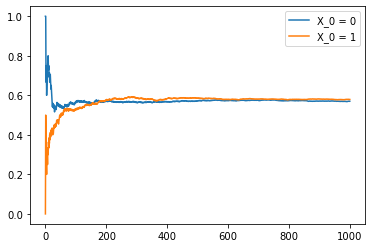

In [9]:
# Solution
n=1000
z0=np.array(traj_markov(0,n))
(z0==0) # renvoie un vecteur True/False selon que les coordonnées de z sont 0 ou 1
(z0==0).mean() # donne la moyenne empirique des 0
(z0==0).cumsum() # renvoie les sommes cummulées de 0, c'est-à-dire le nombre de visites de 0
y0=(z0==0).cumsum()/np.arange(1,n+1) # renvoie les fréquences d'occupation de 0
plt.plot(y0, label = "X_0 = 0")

z1=np.array(traj_markov(1,n))
y1=(z1==0).cumsum()/np.arange(1,n+1) # renvoie les fréquences d'occupation de 0
plt.plot(y1, label = "X_0 = 1")
plt.legend()
plt.show()

En général, la quantité
$$
\frac{1}{n} \sum_{k=0}^{n-1} \mathbb 1_{\{X_n=k\}}
$$
s'interprète comme le taux d'occupation de l'état $k$ jusqu'au temps $n$.

On veut maintenant savoir avec quelle probabilité le fumeur va s'arrêter de fumer.  On cherche donc à déterminer la loi de $X_n$ quand $n$ est grand. 

On peut pour cela, déterminons la mesure empirique d'un échantillon de $X_n$.
 

5) Écrire une fonction `echantillon_markov(n,m)` qui renvoie un échantillon de taille $m$ de la variable $X_n$ (d'état initial $X_0=0$).

In [10]:
#Solution
def echantillon_markov(n,m):
    L=np.zeros(m)
    for k in range(m):
        L[k]=traj_markov(0,n)[-1]
    return L

6) Afficher un diagramme en barre de la mesure empirique de la loi de $X_n$ (on pourra s'inspirer de l'exercice 6 du TP1)

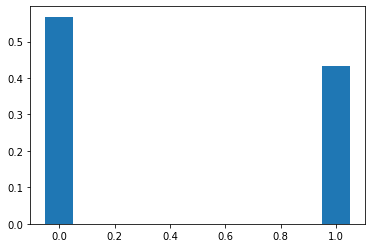

In [11]:
#Solution
m=1000
n=100
x=echantillon_markov(n,m)

visites0=(x==0).sum()/m
visites1=(x==1).sum()/m

width = 0.1
plt.bar([0,1],[visites0,visites1],width)
plt.show()

Tester pour différentes valeurs de $n$ et $m$. Interpréter la figure ci-dessus et comparer avec le résultat numérique obtenu au TD1.

On appelle probabilité invariante une probabilité $\pi$ vu comme un vecteur ligne dont les coefficients somment à 1, vérifiant :
$$
\pi = \pi P
$$

La loi de $X_n$ selon l'état initial est donné par la puissance $n$-ième $P^n$ de la matrice $P$, c'est-à-dire que
$$
\mathbb P(X_n = y | X_0=x) = P^n(x,y).
$$
On a donc que si $X_0$ est distribué selon $\pi$, alors $X_n$ est de loi $\pi$. 

7) Vérifiez que la probabilité $\pi=(\frac{9}{16} \frac{7}{16})$ est une probailité invariante pour la matrice $Q=\begin{pmatrix} 0.3 & 0.7 \\ 0.9 & 0.1 \end{pmatrix}$ de l'introduction. Le produit de matrices se fait à l'aide la commande `np.dot`.

In [12]:
# Solution
Q = np.matrix([[.3,.7],[.9,.1]])
inv=np.matrix([9/16,7/16])
np.dot(inv,Q)==inv

matrix([[ True,  True]])

Il faut faire attention quand on compare des valeurs numériques, par exemple :

In [13]:
np.sqrt(2)*np.sqrt(2) == 2.0

False

On peut utiliser la commande `isclose` pour comparer des valeurs numériques à la précision de la machine utilisée.

In [14]:
np.isclose(np.sqrt(2)*np.sqrt(2), 2)

True

### 2ème exemple

On considère une chaîne à 3 états, de probabilités de transition données par la matrice $P$ :
$$
P=\begin{pmatrix} 0 & \frac12 & \frac12 \\ \frac14 & \frac12 & \frac14 \\ \frac14 & \frac14 & \frac12  \end{pmatrix}
$$

0) Definir la matrice $P$ à l'aide la commande `np.array`.

In [15]:
# Solution
P=np.array([[0,.5,.5],[.25,.5,.25],[.25,.25,.5]])

1) Ecrire une commande qui prend en entrée $x,R,n$ et qui renvoie la trajectoire jusqu'au temps $n$ de la chaîne de Markov de matrice de transtion $R$ et d'état initial $x$.

In [16]:
# Solution
def markov(x,R): # un pas de transition R
    prob = R[x,:] # Les probas sont données par la "xième" ligne de R
    dim=len(prob)
    return np.random.choice(a=dim,p=prob)


def traj_markov(x,R,n): # on réalise n étapes de la chaîne, en commençant dans l'état initial x
    X = x
    traj = [x]
    for i in range(1,n):
        X = markov(X,R)
        traj.append(X)
    return np.array(traj)

2) Illustrer graphiquement le comportement en temps long de la chaîne.

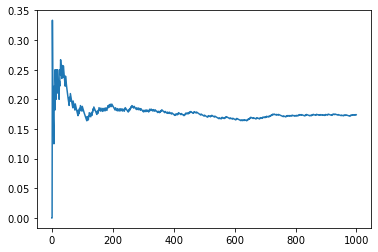

In [17]:
# Solution
n=1000
z=traj_markov(1,P,n)
y=(z==0).cumsum()/np.arange(1,len(z)+1) #donne le vecteur des moyennes de 0
plt.plot(y)
plt.show()

3) Donner une estimation des limites des taux d'occupation des états $0$, $1$ et $2$ en comparant selon l'état initial $x$ choisi.

In [18]:
# Solution
# x=1
z=traj_markov(1,P,1000)
(z==0).mean() , (z==1).mean() , (z==2).mean()

(0.208, 0.415, 0.377)

In [19]:
# x=0
z0=traj_markov(0,P,10000)
(z0==0).mean() , (z0==1).mean() , (z0==2).mean()

(0.2038, 0.4162, 0.38)

4) Cherchons alors la probabilité invariante de la matrice $P$. La relation $\pi=\pi P$ nous dit que $\pi$ est un vecteur propre à gauche de $P$, et donc en prenant la transposée que $\pi^t$ est un vecteur propre à droite de $P^t$ (associé à quelle valeur propre ?). On utilisera la commande `np.linalg.eig` qui à une matice $A$ renvoie ses valeurs propres et vecteurs propres et la commande `np.transpose` qui retourne la transposée.

In [20]:
# Solution
np.linalg.eig(np.transpose(P))

(array([-0.25,  1.  ,  0.25]),
 array([[-8.16496581e-01,  3.33333333e-01, -6.81506437e-17],
        [ 4.08248290e-01,  6.66666667e-01, -7.07106781e-01],
        [ 4.08248290e-01,  6.66666667e-01,  7.07106781e-01]]))

5) Vérifier votre résultat en caluclant $\pi P$. 
Pensez à normaliser le vecteur $\pi$ pour qu'il soit bien une probabilité !

In [21]:
# Vérifions
A=np.transpose(np.linalg.eig(np.transpose(P))[1])[1]
A=A/np.sum(A)
A

array([0.2, 0.4, 0.4])

In [22]:
# Vérifions
np.dot(np.matrix([1/5,2/5,2/5]),P)

np.dot(np.matrix([1/5,2/5,2/5]),P)==A
np.isclose(np.dot(np.matrix([1/5,2/5,2/5]),P), A)

matrix([[ True,  True,  True]])

6) Comparer le résultat obtenu avec les limites des taux d'occupation des états $0,1,2$ de la question 3).

In [23]:
# Solution :



On vient d'illustrer le théorème ergodique suivant : Si $(X_n)_{n\geq0}$ est une chaîne de Markov irréductible (c'est-à-dire que tous les états communiquent), alors elle admet une unique probabilité invariante $\pi$, et de plus, pour tout état initial $x\in E$, on a
$$
\lim_{n\to\infty} \frac{1}{n} \sum_{k=0}^{n-1} P^k(x,y) = \pi(y).
$$

On peut même supposer que $X_0$ suit une loi quelconque $\mu$, et dans ce cas, on a
$$
\lim_{n\to\infty} \frac{1}{n} \sum_{k=0}^{n-1} \mu P^k(y) = \pi(y),
$$
pour tout $y\in E$.

Le théorème est faux si la chaîne n'est pas irréductible comme on pourra s'en convaincre en étudiant la chaîne à deux états de matrice de transition l'identité.

7) Générer une trajectoire de la chaîne de Markov de loi initiale une loi quelconque $\mu$ sur $\{0,1,2\}$, et comparer les taux d'occupation dans le cas $\mu=(\frac17 \frac27 \frac47)$.

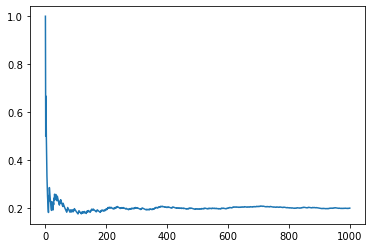

In [24]:
# Solution
x_initial=np.random.choice(a=3,p=[1/7,2/7,4/7])
n=1000
z=traj_markov(x_initial,P,n)
y=(z==0).cumsum()/np.arange(1,len(z)+1) #donne le vecteur des moyennes de 0
plt.plot(y)
plt.show()

In [25]:
#
x_initial=np.random.choice(a=3,p=[1/7,2/7,4/7])
z2=traj_markov(x_initial,P,1000)
(z2==0).mean() , (z2==1).mean() , (z2==2).mean()

(0.205, 0.415, 0.38)

8) Coder les indicateurs $N_{0,0}^{1000} = \sum_{i=0}^{999}\mathbf{1}_{x_i=0,x_{i+1}=0}$, $N_{0,1}^{1000}$, et $N_{0,2}^{1000}$ de l'exercice 6.5 du TD sur une trajectoire de 1000 pas commençant en 0. Quelles estimations sur $P$ pourrait-on faire si on avait uniquement ces indicateurs ?

In [26]:
z = traj_markov(0,P,1000)
N00 = 0 
N01 = 0
N02 = 0
for i in range(999):
    if z[i] == 0:
        if z[i+1] == 0:
            N00 += 1
        elif z[i+1] == 1:
            N01 += 1
        elif z[i+1] == 2:
            N02 += 1

print(N00, N01, N02)
S = N00 + N01 + N02
print("Estimation de la première ligne de P:")
print([N00/S, N01/S, N02/S])

0 103 101
Estimation de la première ligne de P:
[0.0, 0.5049019607843137, 0.4950980392156863]


## 3 - La marche aléatoire sur $\mathbb Z$

On va regarder un exemple de chaîne de Markov sur un espace dénombrable : la marche aléatoire sur $\mathbb Z$. A chaque instant de temps, le marcheur fait un pas en avant avec probabilité $1/2$ ou un pas en arrière avec probabilité $1/2$. On suppose que le marcheur est initialement en 0. On modélise la position du marcheur au temps $n$ par la suite de v.a. $(X_n)_{n\geq0}$ définie par $X_0=0$, et
$$
X_n=Y_1+\cdots+Y_n,
$$
où $(Y_i)_{i\geq1}$ est une suite de v.a. indépendantes et identiquement distribuées, de loi $\frac12\delta_{+1}+\frac12\delta_{-1}$.

1) Ecrire une fonction qui retourne la position (aléatoire) du marcheur au temps $n$.

In [27]:
# Solution
def walk(n):
    if n==0:
        return 0
    else:
        sample=2*np.random.randint(0,2,n)-1
        return np.cumsum(sample)

2) Tracer une trajectoire du marcheur jusqu'au temps 1000.

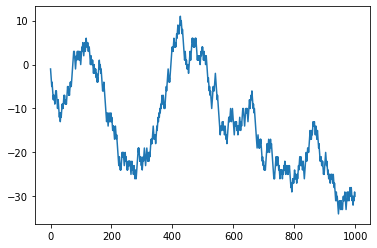

In [28]:
# Solution
plt.plot(walk(1000))
plt.show()

3) Tracer plusieurs trajectoires du marcheur sur le même graphique. Peut-on conjecturer une limite de $X_n$ quand $n\to \infty$ ?

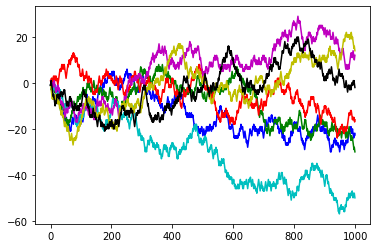

In [29]:
# Solution
for k in ['b','g','r','c','m','y','k']:
    plt.plot(walk(1000),color=k)
plt.show()

In [30]:
# non...

$\mathcal{FIN}$.